In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler,MinMaxScaler
from sklearn.compose import make_column_transformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_absolute_error, confusion_matrix, classification_report, accuracy_score
import warnings
warnings.filterwarnings("ignore")

C:\Users\dell\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


IMPORT DATASET

In [2]:
import os
os.getcwd()

'C:\\Users\\dell\\Downloads'

In [3]:
df = pd.read_csv('gender_classification_v7.csv')

In [4]:
df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
20001,1,13.6,5.1,0,0,0,0,Female
20002,1,11.9,5.4,0,0,0,0,Female
20003,1,12.9,5.7,0,0,0,0,Female
20004,1,13.2,6.2,0,0,0,0,Female


In [5]:
df.shape

(20006, 8)

In [6]:
# Returns basic statistics on numeric columns
df.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,20006.000000,20006.000000,20006.000000,20006.000000,20006.000000,20006.000000,20006.000000
mean,0.869639,13.181356,5.946256,0.493852,0.507848,0.493052,0.498850
std,0.336708,1.107064,0.541228,0.499975,0.499951,0.499964,0.500011
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


In [7]:
# Returns basic information on all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20006 entries, 0 to 20005
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  20006 non-null  int64  
 1   forehead_width_cm          20006 non-null  float64
 2   forehead_height_cm         20006 non-null  float64
 3   nose_wide                  20006 non-null  int64  
 4   nose_long                  20006 non-null  int64  
 5   lips_thin                  20006 non-null  int64  
 6   distance_nose_to_lip_long  20006 non-null  int64  
 7   gender                     20006 non-null  object 
dtypes: float64(2), int64(5), object(1)
memory usage: 1.2+ MB


In [8]:
len(df[df.duplicated])

16773

In [9]:
# in pandas to obtain a summary of missing (null or NaN) values in each column of a DataFrame
df.isnull().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

In [10]:
# df is a DataFrame, df.shape would return a tuple like (n_rows, n_columns)
df.shape

(20006, 8)

In [11]:
# Returns an object with all of the column headers
df.columns

Index(['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide',
       'nose_long', 'lips_thin', 'distance_nose_to_lip_long', 'gender'],
      dtype='object')

In [12]:
# Returns different datatypes for each columns (float, int, string, bool, etc.)
df.dtypes

long_hair                      int64
forehead_width_cm            float64
forehead_height_cm           float64
nose_wide                      int64
nose_long                      int64
lips_thin                      int64
distance_nose_to_lip_long      int64
gender                        object
dtype: object

Data Visualization

In [13]:
df[["long_hair","gender"]].groupby("gender").get_group("Female")["long_hair"].value_counts()

long_hair
1    8738
0    1268
Name: count, dtype: int64

In [14]:
df[["long_hair","gender"]].groupby("gender").get_group("Male")["long_hair"].value_counts()

long_hair
1    8660
0    1340
Name: count, dtype: int64

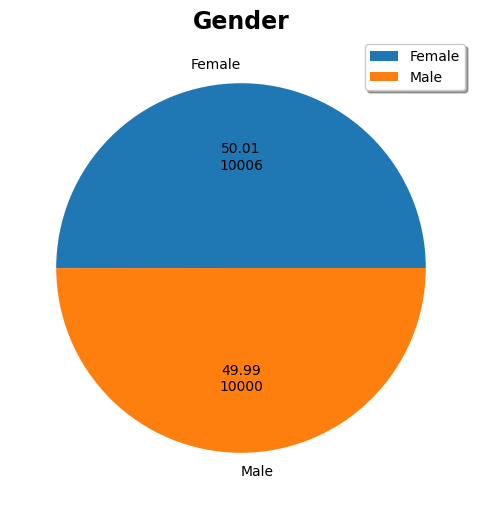

In [15]:
def fun(pct,all_values):
    absolute = (pct/100) * np.sum(all_values)
    return f"{pct :.2f}\n{absolute :.0f}"


plt.figure(figsize=(8,6))
plt.title("Gender",weight='bold',fontsize=17)
plt.pie(df.gender.value_counts().values,labels=df.gender.value_counts().index,autopct=lambda x:fun(x,df.gender.value_counts().values))
plt.legend(shadow=True)
plt.show()

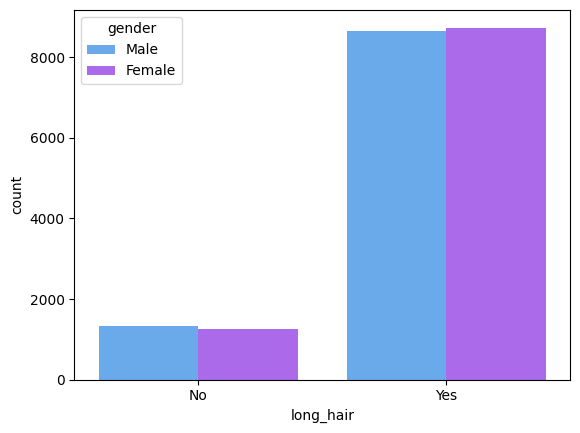

In [16]:
sns.countplot(x=df.long_hair,palette=("cool"),hue=df["gender"])
plt.xticks([0,1],labels=["No","Yes"])
plt.show()

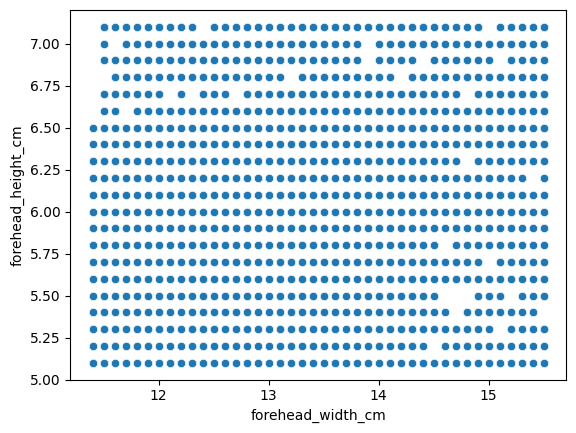

There is no correlation


In [17]:
sns.scatterplot(x=df["forehead_width_cm"],y=df["forehead_height_cm"])
plt.show()
print("There is no correlation")

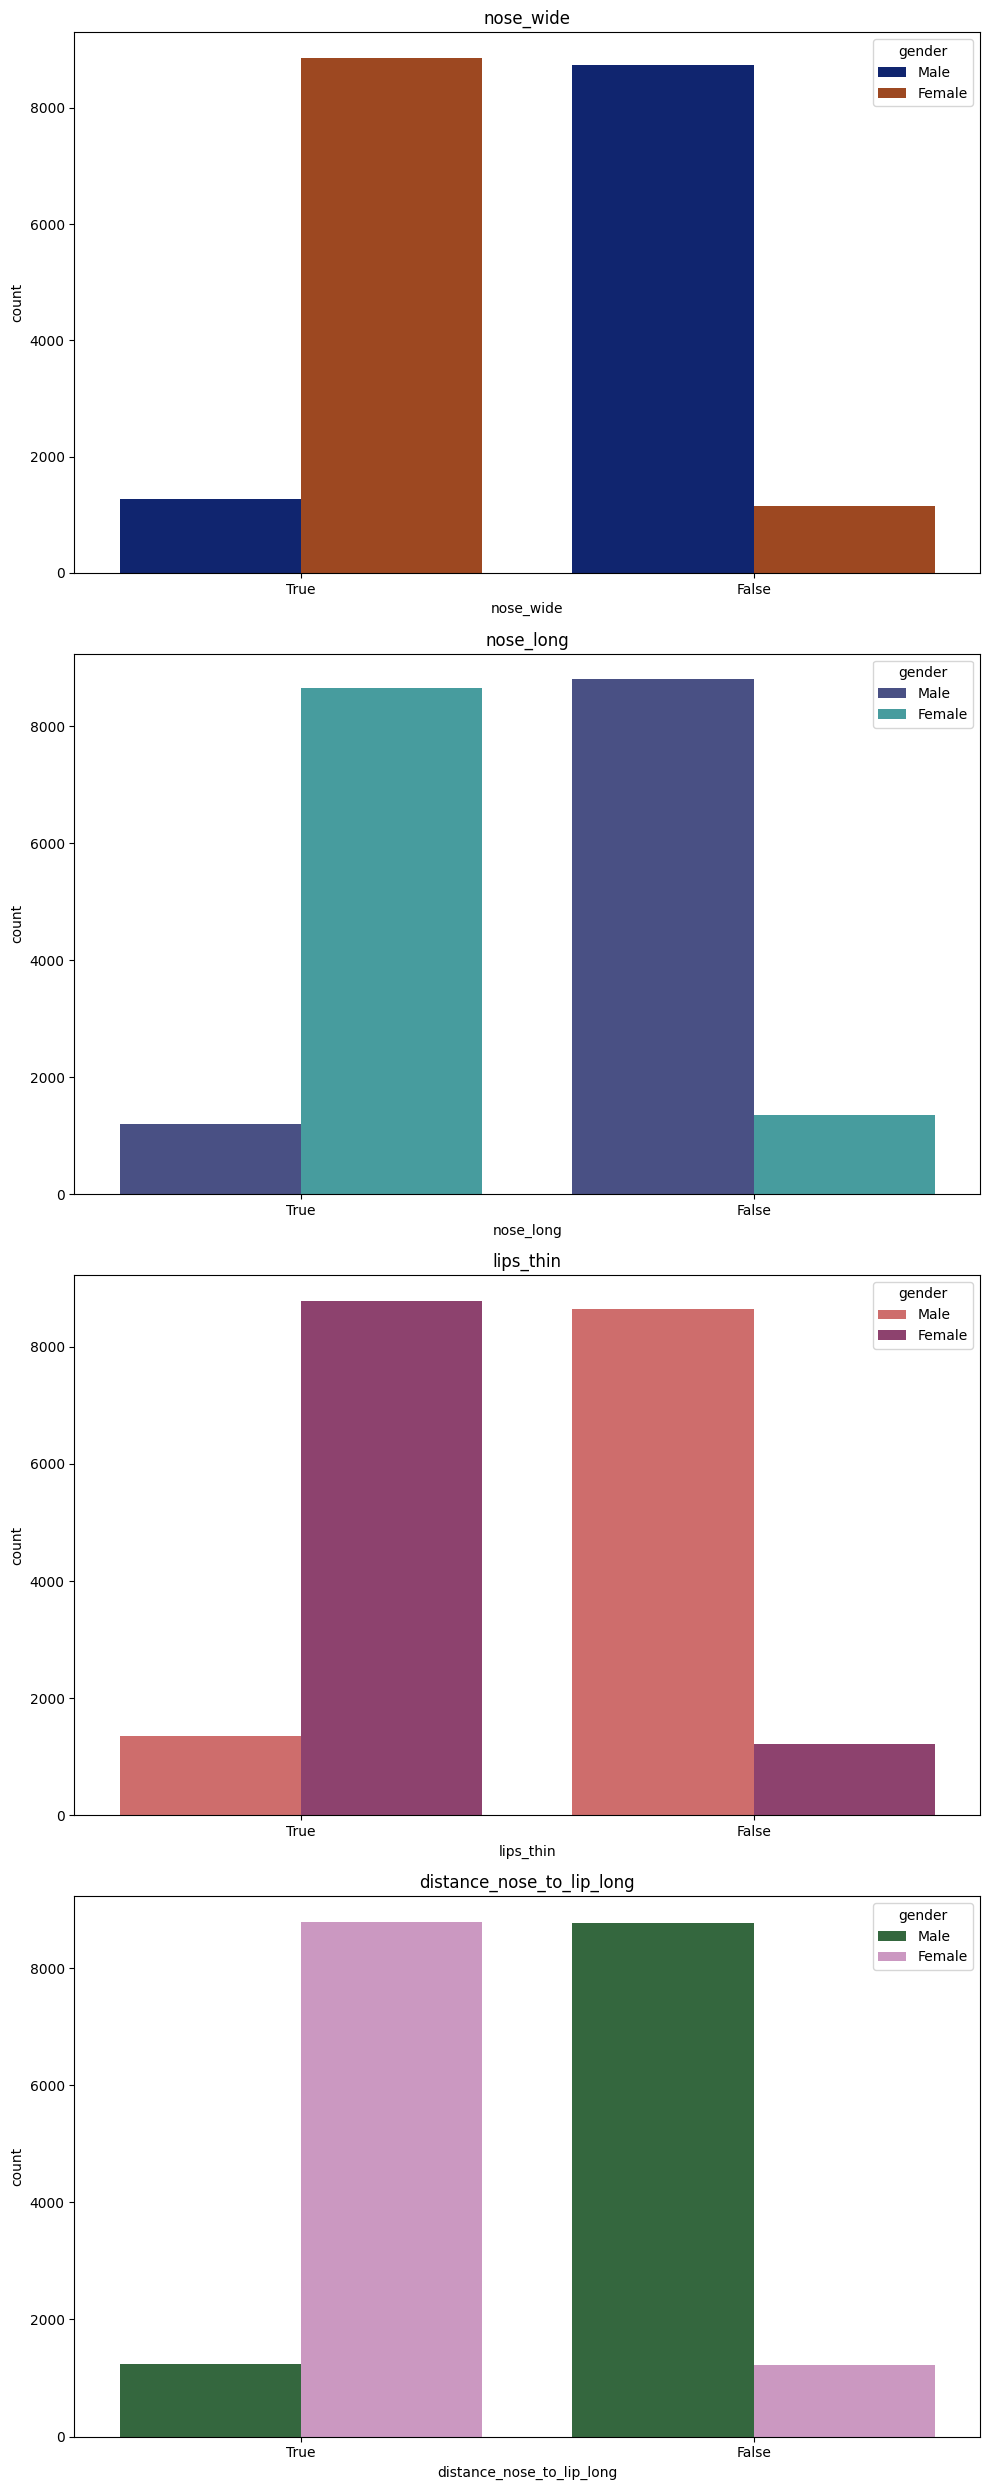

In [18]:
def plot_fun(x,i):
    l = ["dark","mako","flare","cubehelix"]
    plt.subplot(4,1,i)
    plt.title(x)
    sns.countplot(x=df[x],palette=(l[i-1]),hue=df["gender"])
    plt.xticks(ticks=[0,1],labels=["True","False"])

plt.figure(figsize=(10,25))
plot_fun("nose_wide",1)
plot_fun("nose_long",2)
plot_fun("lips_thin",3)
plot_fun("distance_nose_to_lip_long",4)
plt.tight_layout()

DATA PREPROCESSING

In [19]:
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [20]:
le = LabelEncoder()
df.gender = le.fit_transform(df.gender).astype(int)

In [21]:
si = SimpleImputer()
ss = StandardScaler()

In [22]:
mk = make_column_transformer((ss,["forehead_width_cm","forehead_height_cm"]),
                       remainder='drop')

In [23]:
x = mk.fit_transform(df)

In [24]:
df.forehead_width_cm = x[:,0]
df.forehead_height_cm = x[:,1]

In [25]:
df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,-1.247796,0.284072,1,0,1,1,1
1,0,0.739492,-1.009316,0,0,1,0,0
2,0,-1.247796,0.653612,1,1,1,1,1
3,0,1.100817,0.284072,0,1,1,1,1
4,1,0.287836,-0.085467,0,0,0,0,0
...,...,...,...,...,...,...,...,...
20001,1,0.378167,-1.563625,0,0,0,0,0
20002,1,-1.157465,-1.009316,0,0,0,0,0
20003,1,-0.254152,-0.455007,0,0,0,0,0
20004,1,0.016842,0.468842,0,0,0,0,0


MODELING

In [26]:
x = df[["forehead_width_cm","forehead_height_cm","nose_wide","nose_long","lips_thin","distance_nose_to_lip_long"]]
y = df[["gender"]]

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

# LogisticRegression

In [28]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred1 = lr.predict(x_test)
lr_acc = accuracy_score(y_pred1, y_test)
print("Test accuracy: {:.2f}%".format(lr_acc*100))

Test accuracy: 96.95%


In [29]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2058
           1       0.97      0.97      0.97      1944

    accuracy                           0.97      4002
   macro avg       0.97      0.97      0.97      4002
weighted avg       0.97      0.97      0.97      4002



# KNeighborsClassifier

In [30]:
KNN = KNeighborsClassifier()
KNN.fit(x_train, y_train)
y_pred2 = KNN.predict(x_test)
KNN_acc = accuracy_score(y_pred2, y_test)
print("Test accuracy: {:.2f}%".format(KNN_acc*100))

Test accuracy: 98.20%


In [31]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2058
           1       0.98      0.98      0.98      1944

    accuracy                           0.98      4002
   macro avg       0.98      0.98      0.98      4002
weighted avg       0.98      0.98      0.98      4002



# DecisionTreeClassifier

In [32]:
Dt = DecisionTreeClassifier()
Dt.fit(x_train, y_train)
y_pred3 = Dt.predict(x_test)
Dt_acc = accuracy_score(y_pred3, y_test)
print("Test accuracy: {:.2f}%".format(Dt_acc*100))

Test accuracy: 99.58%


In [33]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2058
           1       0.99      1.00      1.00      1944

    accuracy                           1.00      4002
   macro avg       1.00      1.00      1.00      4002
weighted avg       1.00      1.00      1.00      4002



# SVC

In [34]:
svc = SVC()
svc.fit(x_train, y_train)
y_pred4 = Dt.predict(x_test)
svc_acc = accuracy_score(y_pred4, y_test)
print("Test accuracy: {:.2f}%".format(svc_acc*100))

Test accuracy: 99.58%


In [35]:
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2058
           1       0.99      1.00      1.00      1944

    accuracy                           1.00      4002
   macro avg       1.00      1.00      1.00      4002
weighted avg       1.00      1.00      1.00      4002



# RandomForestClassifier

In [36]:
Rfc = RandomForestClassifier()
Rfc.fit(x_train, y_train)
y_pred5 = Rfc.predict(x_test)
Rfc_acc = accuracy_score(y_pred5, y_test)
print("Test accuracy: {:.2f}%".format(Rfc_acc*100))

Test accuracy: 99.68%


In [37]:
print(classification_report(y_test,y_pred5))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2058
           1       1.00      1.00      1.00      1944

    accuracy                           1.00      4002
   macro avg       1.00      1.00      1.00      4002
weighted avg       1.00      1.00      1.00      4002



In [38]:
result = pd.DataFrame({
    'Model': ['LogisticRegression', 'KNeighborsClassifier', 'DecisionTreeClassifier', 'SVC', 'RandomForestClassifier'],
    'Accuracy' : [lr_acc, KNN_acc, Dt_acc, svc_acc, Rfc_acc]
})

result.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
4,RandomForestClassifier,0.996752
2,DecisionTreeClassifier,0.995752
3,SVC,0.995752
1,KNeighborsClassifier,0.982009
0,LogisticRegression,0.969515


<div style="border-radius:20px; padding: 15px; font-size:100%; text-align:left; background-image: url(https://i.postimg.cc/0jG2Q5Nm/Adobe-Stock-522250922-Preview-Medium.jpg)">

<h3 style="font-size:185%; font-weight:bolder; color:#005f26">Results : </h3>

<span style="font-size:120%; font-weight:700; color:#005f26">Acording to the above plots, best Model  base on Score is :</span>

<span style="font-size:100%; font-weight:500; color:#005f26">
<ul><b>RandomForestClassifier</b></ul>
</br>
</span>

<span style="font-size:150%; font-weight:bolder; color:navy">So, We choose <mark> RandomForestClassifier </mark></span>
</div>